## <font color='black'>Data Science Aplicada à Área de Saúde</font>
>### <font color='gray'>*DS* 3a | COVID19 : *EDA, DataPrep, ML e Data Storytelling*</font>
>#### <font color='gray'>professor *Rodrigo Signorini*</font>
>#### <font color='gray'>*Grupo 1:*</font>
> - <font color='gray'>CAROLINE MIDORI LULIO KAMEOKA </font>
> - <font color='gray'>GUSTAVO CASTELO BRANCO RAMOS NAKANDAKARI </font>
> - <font color='gray'>GUSTAVO SHITARA </font>
> - <font color='gray'>LUIZ PHELLIPE DELL AQUILA </font>
> - <font color='gray'>ROBERTO GARCIA VINUELA  </font>
> - <font color='gray'>VÍTOR HUGO MELO DE ALMEIDA </font>

### Definição do Problema de Negócio

Com base em resultados de exames laboratoriais, onde todos os dados foram anonimizados seguindo as melhores práticas e recomendações internacionais, desenvolver um modelo para predizer a probabilidade de um paciente testar positivo para *SARS-Cov-2 (COVID-19)*.

<font color='gray'>**IMPORTANTE**</font>

> Todos os dados clínicos já se encontram transformados pela técnica de *padronização*.

<font color='red'>**Entrega**</font>

*#1.* **_Notebook_**: Todo o processo de desenvolvimento deverá ser apresentado de forma bem estruturada, bem definida e muito bem embasada. Todas as etapas, desde a importação dos dados e suas respectivas análises e preparações para a devida entrega aos algoritmos de *Machine Learning*, seguindo até a avaliação final para a escolha do modelo, deve ser realizada utilizando-se apenas os conceitos, as técnicas e as ferramentas aprendidas em sala de aula.

*#2.* **_Storytelling_**: Diferentemente do embasamento estritamente técnico apresentado via *notebook*, deverá ser entregue um documento - em formato a escolher - elaborado de forma que os resultados obtidos possam ser comunicados eficientemente a qualquer tipo de público, técnico ou não. Para tanto, elementos como um excelente entendimento sobre o contexto, a escolha de uma apresentação visual adequada, sem excessos e com foco nos objetivos são a chave para que se possa contar uma boa história com os dados.

**_Sugestão de link referente ao tema Storytelling_**
    
> http://www.storytellingwithdata.com/

**_Sugestão de livro referente ao tema Storytelling_**

> <font color='blue'>**Storytelling com Dados**: Um guia sobre visualização de dados para profissionais de negócios</font>
>
> *Cole Nussbaumer Knaflic*

Trecho do livro sugerido acima:

_"...há uma distinção importante a fazer entre análise exploratória e explanatória. A análise exploratória é a que você faz para compreender os dados e descobrir o que pode ser digno de nota ou interessante a destacar para outras pessoas. Quando fazemos uma análise exploratória, é como procurar pérolas em ostras. Talvez precisemos abrir 100 ostras (testar 100 diferentes hipóteses ou examinar os dados de 100 diferentes maneiras) para encontrar, digamos, duas pérolas.
Quando estamos a ponto de comunicar nossa análise para nosso público, queremos estar no espaço explanatório, significando que você tem algo específico que deseja explicar, uma história específica que deseja contar — provavelmente sobre aquelas duas pérolas.
Com muita frequência, as pessoas se enganam e pensam que podem mostrar uma análise exploratória (simplesmente apresentar os dados, todas as 100 ostras), quando deveriam mostrar a explanatória (dedicar tempo para transformar os dados em informações que possam ser consumidas por um público: as duas pérolas). É um erro compreensível. Depois de se fazer toda uma análise, pode ser tentador mostrá-la inteira ao seu público, como evidência de todo o trabalho que você fez e da robusteza da análise. Resista a esse desejo. Você estaria fazendo seu público reabrir todas as ostras! Concentre-se nas pérolas, a informação que seu público precisa saber."_

## Job

### Contexto

- O objetivo do trabalho foi construir um modelo para **predizer a probabilidade de um paciente ter Covid-19**. Esse objetivo foi alcançado pela construção de um modelo preditivo treinado com as variáveis de resultados de exames laboratoriais. 

- A performance do modelo será avaliada pelo indicador *Recall* (sensitividade), que mede a identificação correta dos verdadeiros positivos, estabelecido o critério de que é desejável a **diminuição de falsos negativos** (isso é, o modelo deve priorizar o atendimento de pacientes, mesmo com o risco de seus custos). 

### Exploração e Preparação de Dados

**Fluxo**: Importação das bibliotecas relevantes e do dataset, além da configuração do ambiente.

In [1]:
# importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# configurando ambiente
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# importando o dataframe
df_raw = pd.read_excel('data/dataset.xlsx')
df_raw.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# identificando estrutura geral do DataFrame
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


**Fluxo:** Checagem da integridade e completude dos dataset.

In [5]:
# checagem de duplicatas
print('Quantidade de linhas dulicadas: ',df_raw.duplicated().sum())

Quantidade de linhas dulicadas:  0


In [6]:
# quantidade de valores não nulos nas variáveis
(df_raw.notnull().sum()).sort_values(ascending=False)

Patient ID                                               5644
Patient age quantile                                     5644
SARS-Cov-2 exam result                                   5644
Patient addmited to regular ward (1=yes, 0=no)           5644
Patient addmited to semi-intensive unit (1=yes, 0=no)    5644
Patient addmited to intensive care unit (1=yes, 0=no)    5644
Influenza B                                              1354
Respiratory Syncytial Virus                              1354
Influenza A                                              1354
Metapneumovirus                                          1352
Parainfluenza 2                                          1352
Bordetella pertussis                                     1352
Inf A H1N1 2009                                          1352
CoronavirusOC43                                          1352
Coronavirus229E                                          1352
Parainfluenza 4                                          1352
Adenovir

**Análise:** Há muitos nulos nas variáveis potencialmente preditoras. Pelo padrão de volumetria de nulos, o dataset aparenta ser a junção de subgrupos de dados. Destacam-se dois subgrupos: variáveis relacionadas ao **hemograma** (\~90% de nulos) e ao **painel respiratório viral** (\~76% de nulos). O restante das variáveis não podem ser utilizadas como preditoras ou apresentam volumetria de não-nulos insuficiente.

**Decisão**: Como o hemograma é um procedimento de baixa complexidade (custo e duração) e alta aplicabilidade, seu uso para o negócio é mais exequível e promissor em relação ao painel viral — procedimento de maior custo, complexidade e tempo. Por mais que o segundo contenha menos nulos e possa se correlacionar melhor com a *target*, sua aplicação em um protocolo e o impacto no negócio seriam pouco tangíveis. **Optou-se pela manutenção apenas das amostras que possuem informações completas do hemograma**. 

In [7]:
# filtro de DataFrame com apenas as variáveis do hemograma e a target
colunas_mantidas_hg = [
    "SARS-Cov-2 exam result",
    "Hematocrit",
    "Hemoglobin",
    "Leukocytes",
    "Red blood cell distribution width (RDW)",
    "Mean corpuscular volume (MCV)",
    "Mean corpuscular hemoglobin (MCH)",
    "Basophils",
    "Eosinophils",
    "Mean corpuscular hemoglobin concentration (MCHC)",
    "Lymphocytes",
    "Red blood Cells",
    "Platelets",
    "Monocytes",
    "Mean platelet volume "
]
df_hg_01 = df_raw.loc[:,colunas_mantidas_hg]
df_hg_01.head()

,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Basophils,Eosinophils,Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
0,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,0.236515,-0.02234,-0.09461,-0.625073,0.166192,-0.292269,-0.223767,1.482158,-0.95079,0.318366,0.102004,-0.517413,0.357547,0.010677
2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# excluindo do DF-hemograma qualquer linha que contenha algum valor nulo
df_hg_01 = df_hg_01.dropna(how='any')
df_hg_01.shape

(598, 15)

In [9]:
df_hg_01.head()

,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Basophils,Eosinophils,Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1,negative,0.236515,-0.022340,-0.094610,-0.625073,0.166192,-0.292269,-0.223767,1.482158,-0.950790,0.318366,0.102004,-0.517413,0.357547,0.010677
8,negative,-1.571682,-0.774212,0.364550,-0.978899,-1.336024,0.178175,-0.223767,1.018625,3.331071,-0.005738,-0.850035,1.429667,0.068652,-1.672222
15,negative,-0.747693,-0.586244,-0.884923,-1.067355,1.668409,1.746323,0.081693,-0.666950,0.542882,-1.114514,-1.361315,-0.429480,1.276759,-0.213711
18,negative,0.991838,0.792188,-0.211488,0.171035,0.606842,0.334989,-0.834685,-0.709090,-0.452899,0.045436,0.542763,0.072992,-0.220244,-0.550290
22,negative,0.190738,-0.147652,-1.132592,0.613318,0.566783,-0.083183,0.387152,-0.709090,-1.249524,0.002791,-0.127191,-0.668155,2.012129,1.020415


In [10]:
# checando o tipo de dados
df_hg_01.dtypes

SARS-Cov-2 exam result                               object
Hematocrit                                          float64
Hemoglobin                                          float64
Leukocytes                                          float64
Red blood cell distribution width (RDW)             float64
Mean corpuscular volume (MCV)                       float64
Mean corpuscular hemoglobin (MCH)                   float64
Basophils                                           float64
Eosinophils                                         float64
Mean corpuscular hemoglobin concentration (MCHC)    float64
Lymphocytes                                         float64
Red blood Cells                                     float64
Platelets                                           float64
Monocytes                                           float64
Mean platelet volume                                float64
dtype: object

**Análise:** Todos os dados são do tipo float pois já foram padronizados.

In [11]:
# checando os valores únicos da target
df_hg_01["SARS-Cov-2 exam result"].unique()

array(['negative', 'positive'], dtype=object)

In [12]:
# mapeando as classes da target para um padrão binário 0/1
df_hg_01['SARS-Cov-2 exam result'] = df_hg_01['SARS-Cov-2 exam result'].replace({'negative': 0, 'positive': 1})
df_hg_01["SARS-Cov-2 exam result"].unique()

array([0, 1], dtype=int64)

In [13]:
# valores únicos de todas as variáveis
for i in df_hg_01.columns:
    print(str(i),':', df_hg_01[i].nunique())

SARS-Cov-2 exam result : 2
Hematocrit : 175
Hemoglobin : 84
Leukocytes : 471
Red blood cell distribution width (RDW) : 60
Mean corpuscular volume (MCV) : 187
Mean corpuscular hemoglobin (MCH) : 89
Basophils : 17
Eosinophils : 86
Mean corpuscular hemoglobin concentration (MCHC) : 56
Lymphocytes : 317
Red blood Cells : 208
Platelets : 248
Monocytes : 146
Mean platelet volume  : 48


### > U N I V A R I A D A

<Axes: ylabel='Frequency'>

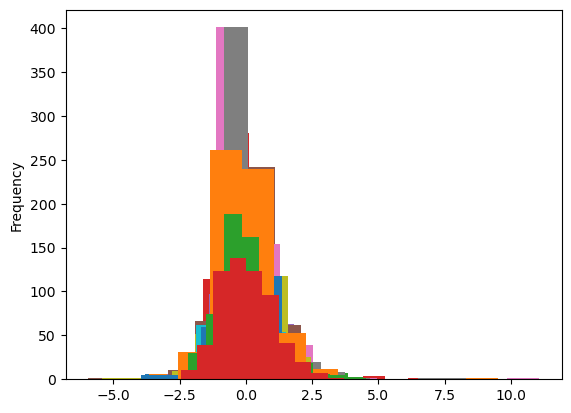

In [14]:
# verificando a distribuição das variáveis
df_hg_01['Hematocrit'].plot.hist()
df_hg_01['Hemoglobin'].plot.hist()
df_hg_01['Leukocytes'].plot.hist()
df_hg_01['Red blood cell distribution width (RDW)'].plot.hist()
df_hg_01['Mean corpuscular volume (MCV)'].plot.hist()
df_hg_01['Mean corpuscular hemoglobin (MCH)'].plot.hist()
df_hg_01['Basophils'].plot.hist()
df_hg_01['Eosinophils'].plot.hist()
df_hg_01['Mean corpuscular hemoglobin concentration (MCHC)'].plot.hist()
df_hg_01['Lymphocytes'].plot.hist()
df_hg_01['Red blood Cells'].plot.hist()
df_hg_01['Platelets'].plot.hist()
df_hg_01['Monocytes'].plot.hist()
df_hg_01['Mean platelet volume '].plot.hist()

**Análise:** Aparentemente, a maior parte das variáveis tem distribuição normal e é possível identificar a presença de outliers para algumas delas. 

**Decisão:** Optou-se por realizar a análise bivariada (associação entre variáveis) antes de lidar com os outliers, uma vez que algumas variáveis podem ter alta multicolinearidade e/ou correlações desprezíveis.

### > BIVARIADA

In [15]:
# retomada das variáveis escolhidas para o modelo e suas informações
df_hg_01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, 1 to 5643
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   SARS-Cov-2 exam result                            598 non-null    int64  
 1   Hematocrit                                        598 non-null    float64
 2   Hemoglobin                                        598 non-null    float64
 3   Leukocytes                                        598 non-null    float64
 4   Red blood cell distribution width (RDW)           598 non-null    float64
 5   Mean corpuscular volume (MCV)                     598 non-null    float64
 6   Mean corpuscular hemoglobin (MCH)                 598 non-null    float64
 7   Basophils                                         598 non-null    float64
 8   Eosinophils                                       598 non-null    float64
 9   Mean corpuscular hemoglob

**Decisão:** Como não foi possível verificar a normalidade com mais minúcia, optou-se pelo coeficiente de correlação Spearman, uma vez que esse é mais robusto.

<Axes: >

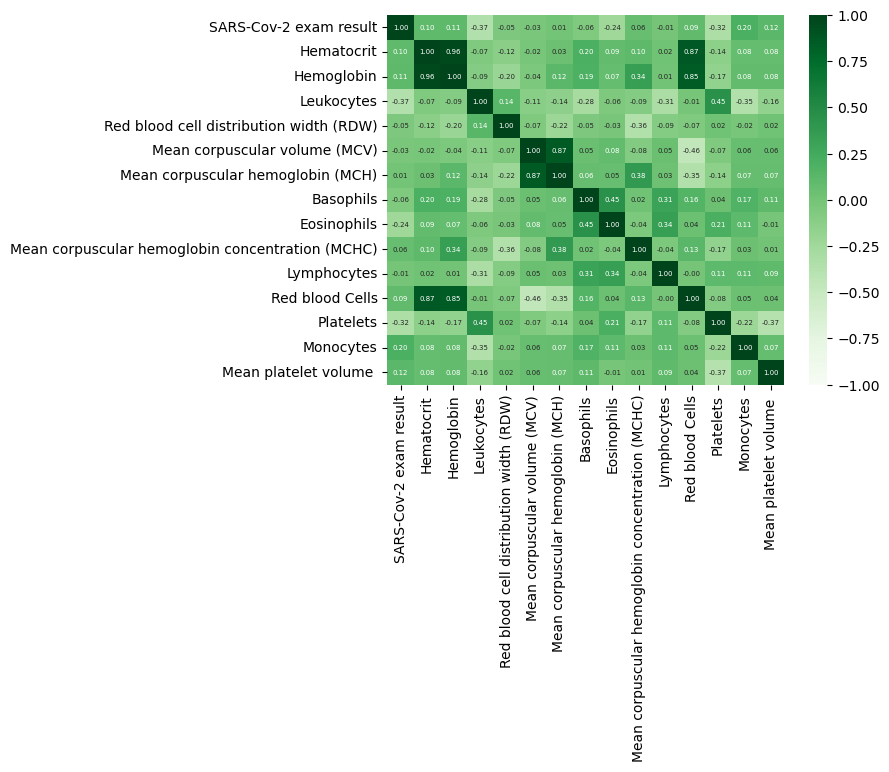

In [16]:
# criação do mapa de calor da matriz de correlação 
coef_matrix_spearman1 = df_hg_01.corr(method='spearman')
sns.heatmap(data=coef_matrix_spearman1, vmin=-1, vmax=1, cmap='Greens', annot=True, fmt='.2f', annot_kws = {'size': 5})

**Análise:** Nota-se que os maiores coeficientes de correlação com a target são com as variáveis: 'Leukocytes', 'Platelets', 'Eosinophils','Monocytes'. As duas primeiras representam elementos figurados do sangue associados à resposta imunológica inata, o que faz sentido com o momento em que os dados foram amostrados. Nota-se que certas variáveis apresentam correlações muito baixas e podem ser uma fonte de ruído para o modelo, ainda mais se esse for suscetível à "maldição da dimensionalidade".

In [17]:
# nova cópia do DF
df_hg_02 = df_hg_01.copy()

In [18]:
df_hg_02.head()

,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Basophils,Eosinophils,Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1,0,0.236515,-0.022340,-0.094610,-0.625073,0.166192,-0.292269,-0.223767,1.482158,-0.950790,0.318366,0.102004,-0.517413,0.357547,0.010677
8,0,-1.571682,-0.774212,0.364550,-0.978899,-1.336024,0.178175,-0.223767,1.018625,3.331071,-0.005738,-0.850035,1.429667,0.068652,-1.672222
15,0,-0.747693,-0.586244,-0.884923,-1.067355,1.668409,1.746323,0.081693,-0.666950,0.542882,-1.114514,-1.361315,-0.429480,1.276759,-0.213711
18,0,0.991838,0.792188,-0.211488,0.171035,0.606842,0.334989,-0.834685,-0.709090,-0.452899,0.045436,0.542763,0.072992,-0.220244,-0.550290
22,0,0.190738,-0.147652,-1.132592,0.613318,0.566783,-0.083183,0.387152,-0.709090,-1.249524,0.002791,-0.127191,-0.668155,2.012129,1.020415


In [19]:
# identificando o problema com a string de uma das variáveis (MCHC)
df_hg_02.columns.values

array(['SARS-Cov-2 exam result', 'Hematocrit', 'Hemoglobin', 'Leukocytes',
       'Red blood cell distribution width (RDW)',
       'Mean corpuscular volume (MCV)',
       'Mean corpuscular hemoglobin (MCH)', 'Basophils', 'Eosinophils',
       'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
       'Lymphocytes', 'Red blood Cells', 'Platelets', 'Monocytes',
       'Mean platelet volume '], dtype=object)

**Fluxo:** Aplicou-se as técnicas VIF (*Variance Inflation Factor*) para averiguar a multicolinearidade das variáveis e a MI (*Mutual Information*) para quantificar a informação compartilhada entre as variáveis preditoras e a *target*.

In [20]:
# criação de matriz com preditoras e constante
X = df_hg_02.drop(columns=['SARS-Cov-2 exam result'])

from statsmodels.tools.tools import add_constant
X = add_constant(X)

X.head()

,const,Hematocrit,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Mean corpuscular volume (MCV),Mean corpuscular hemoglobin (MCH),Basophils,Eosinophils,Mean corpuscular hemoglobin concentration (MCHC),Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1,1.0,0.236515,-0.022340,-0.094610,-0.625073,0.166192,-0.292269,-0.223767,1.482158,-0.950790,0.318366,0.102004,-0.517413,0.357547,0.010677
8,1.0,-1.571682,-0.774212,0.364550,-0.978899,-1.336024,0.178175,-0.223767,1.018625,3.331071,-0.005738,-0.850035,1.429667,0.068652,-1.672222
15,1.0,-0.747693,-0.586244,-0.884923,-1.067355,1.668409,1.746323,0.081693,-0.666950,0.542882,-1.114514,-1.361315,-0.429480,1.276759,-0.213711
18,1.0,0.991838,0.792188,-0.211488,0.171035,0.606842,0.334989,-0.834685,-0.709090,-0.452899,0.045436,0.542763,0.072992,-0.220244,-0.550290
22,1.0,0.190738,-0.147652,-1.132592,0.613318,0.566783,-0.083183,0.387152,-0.709090,-1.249524,0.002791,-0.127191,-0.668155,2.012129,1.020415


In [21]:
# Calculando VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

vif.round(4).sort_values(by='VIF Factor', ascending=False)

,features,VIF Factor
1,Hematocrit,1336.1812
2,Hemoglobin,1160.6392
6,Mean corpuscular hemoglobin (MCH),512.9376
5,Mean corpuscular volume (MCV),460.3841
11,Red blood Cells,246.9865
9,Mean corpuscular hemoglobin concentration (MCHC),142.9557
3,Leukocytes,1.7823
12,Platelets,1.7279
4,Red blood cell distribution width (RDW),1.4529
7,Basophils,1.3104


**Análise:** Com base no VIF, observou-se que as variáveis associadas às hemácias carregavam os dados com multicolinearidade, em especial 'Hemoglobin' e 'Hematocrit'. 

**Decisão:** Seguindo a ordem de prioridade: correlação com target > contribuição à multicolinearidade (VIF), as variáveis eleitas para exclusão foram:

- 'Hematocrit';
- 'Mean corpuscular hemoglobin concentration (MCHC)'; 
- 'Mean corpuscular volume (MCV)';
- 'Mean corpuscular hemoglobin (MCH).

In [22]:
df_hg_02 = df_hg_01.drop(['Hematocrit', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Mean corpuscular volume (MCV)', 'Mean corpuscular hemoglobin (MCH)'], axis=1)
# alternativas na forma de comentário
# df_hg_02 = df_hg_01.drop(['Hematocrit'], axis=1)
# df_hg_02 = 


In [23]:
# cálculo do VIF
X = df_hg_02.drop(columns=['SARS-Cov-2 exam result'])
X = add_constant(X)

vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

vif.round(4).sort_values(by='VIF Factor', ascending=False)

,features,VIF Factor
1,Hemoglobin,4.8832
7,Red blood Cells,4.3404
2,Leukocytes,1.7407
8,Platelets,1.6251
4,Basophils,1.3018
6,Lymphocytes,1.2697
3,Red blood cell distribution width (RDW),1.2577
10,Mean platelet volume,1.1938
5,Eosinophils,1.1893
9,Monocytes,1.1152


In [24]:
# DF-hemograma sem multicolinearidade considerável
df_hg_02.head()

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1,0,-0.022340,-0.094610,-0.625073,-0.223767,1.482158,0.318366,0.102004,-0.517413,0.357547,0.010677
8,0,-0.774212,0.364550,-0.978899,-0.223767,1.018625,-0.005738,-0.850035,1.429667,0.068652,-1.672222
15,0,-0.586244,-0.884923,-1.067355,0.081693,-0.666950,-1.114514,-1.361315,-0.429480,1.276759,-0.213711
18,0,0.792188,-0.211488,0.171035,-0.834685,-0.709090,0.045436,0.542763,0.072992,-0.220244,-0.550290
22,0,-0.147652,-1.132592,0.613318,0.387152,-0.709090,0.002791,-0.127191,-0.668155,2.012129,1.020415


In [25]:
# Mutual information
from sklearn.feature_selection import mutual_info_classif

feature_names = df_hg_02.columns

X_mi = df_hg_02.drop(columns=['SARS-Cov-2 exam result'])
y_mi = df_hg_02['SARS-Cov-2 exam result']

seed=1234

# retorna um ndarray
list_mi = mutual_info_classif(X_mi, y_mi, random_state=seed)
print(list_mi)

[0.         0.07361195 0.         0.03269409 0.04734565 0.
 0.         0.04487432 0.02121732 0.00749272]


In [26]:
df_mi = pd.DataFrame(list_mi, index=feature_names[1:], columns=['MI'])
df_mi.sort_values(by='MI', ascending=False)

,MI
Leukocytes,0.073612
Eosinophils,0.047346
Platelets,0.044874
Basophils,0.032694
Monocytes,0.021217
Mean platelet volume,0.007493
Hemoglobin,0.000000
Red blood cell distribution width (RDW),0.000000
Lymphocytes,0.000000
Red blood Cells,0.000000


<Axes: >

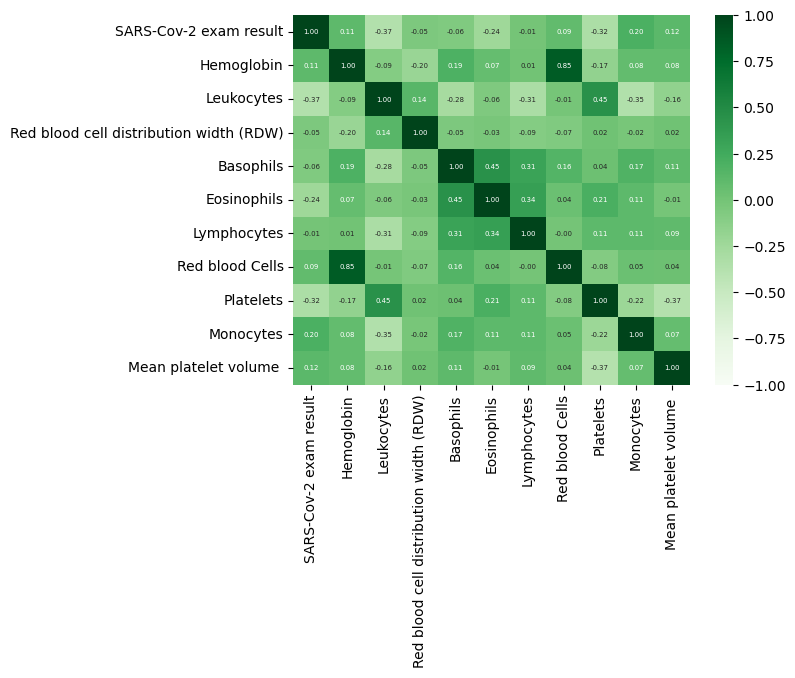

In [27]:
# matriz de correlação com colunas dropadas
coef_matrix_spearman2 =df_hg_02.corr(method='spearman')
sns.heatmap(data=coef_matrix_spearman2, vmin=-1, vmax=1, cmap='Greens', annot=True, 
            fmt='.2f', annot_kws = {'size': 5})

### > OUTLIERS

[Text(1, 0, 'SARS-Cov-2 exam result'),
 Text(2, 0, 'Hemoglobin'),
 Text(3, 0, 'Leukocytes'),
 Text(4, 0, 'Red blood cell distribution width (RDW)'),
 Text(5, 0, 'Basophils'),
 Text(6, 0, 'Eosinophils'),
 Text(7, 0, 'Lymphocytes'),
 Text(8, 0, 'Red blood Cells'),
 Text(9, 0, 'Platelets'),
 Text(10, 0, 'Monocytes'),
 Text(11, 0, 'Mean platelet volume ')]

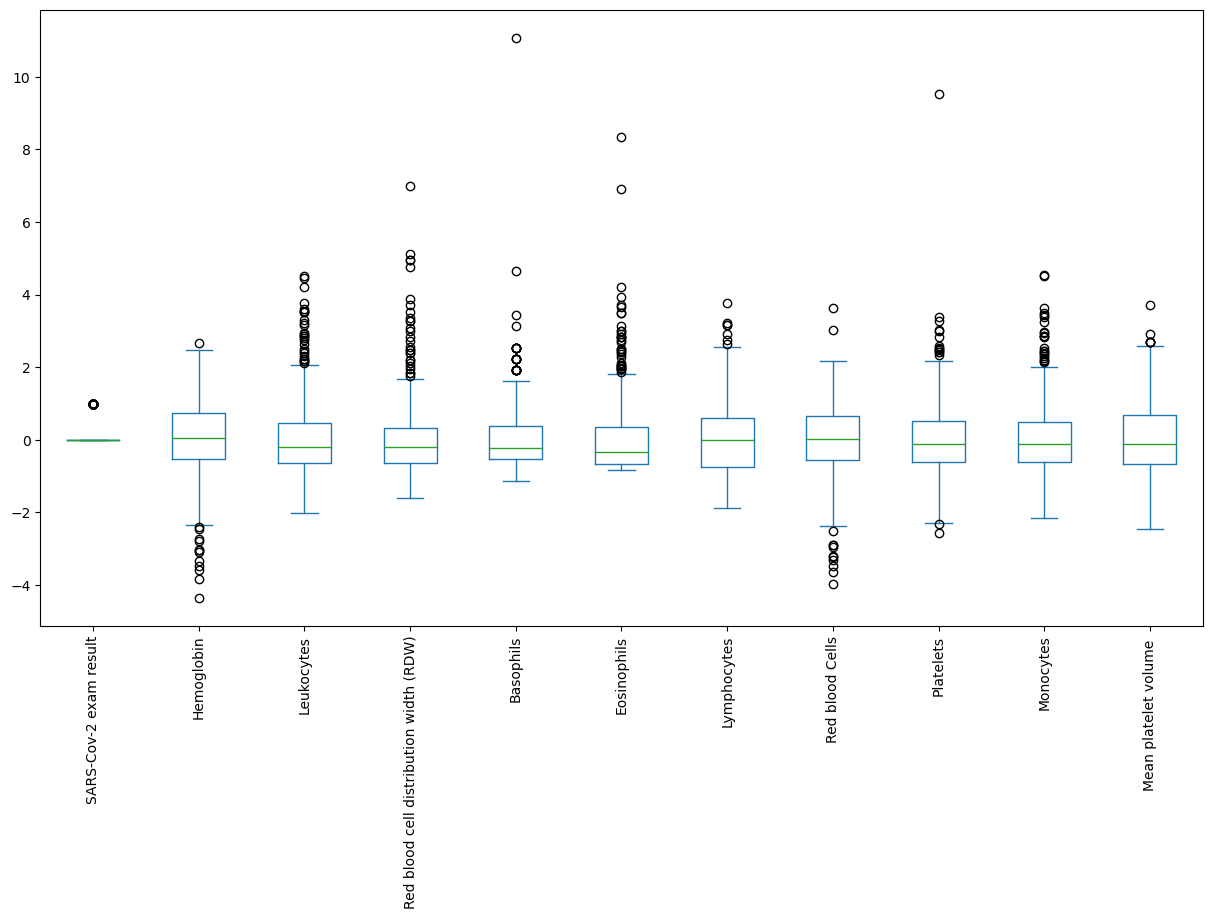

In [28]:
# boxplot para visualização de outliers
ax = df_hg_02.plot.box(figsize=(15,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

**Análise:** A maior parte dos outliers são contínuos ao limite superior do boxplot e não substanciais. Destaca-se a presença de alguns outliers isolados que podem impactar o modelo.

**Decisão:** Após inspeção visual, optou-se por excluir os outliers acima de 6 das variáveis 'RDW', 'Eosinophils', 'Basophils' e 'Platelets'. Desses, apenas 'Eosinophils' e 'Basophils' apresentam algum MI e coeficiente de correlação com a target.


In [29]:
df_hg_03 = df_hg_02.copy()

In [30]:
# analisando outlier de RDW
df_hg_03.sort_values(by='Red blood cell distribution width (RDW)', ascending=False).head(1)

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
3294,0,-0.147652,-0.876575,6.982184,1.303529,2.282806,0.378069,0.137265,-0.07775,0.935337,-1.223449


In [31]:
# remoção de outlier
df_hg_03 = df_hg_03.drop(df_hg_03[df_hg_03['Red blood cell distribution width (RDW)'] > 6].index)

In [32]:
# analisando outlier de Basophils
df_hg_03.sort_values(by='Basophils', ascending=False).head(1)

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
5041,0,-1.463427,-1.789331,3.355468,11.078219,0.00728,-0.014267,-1.713922,-2.552426,-0.246507,2.703313


In [33]:
# remoção de outlier
df_hg_03 = df_hg_03.drop(df_hg_03[df_hg_03['Basophils'] > 6].index)

In [34]:
# analisando outlier de Eosinophils
df_hg_03.sort_values(by='Eosinophils', ascending=False).head(2)

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1221,0,0.980156,-0.837616,-0.448160,1.303529,8.350876,0.309837,0.119635,0.273981,-0.640455,0.683835
443,0,-1.275460,-0.261578,0.259492,-0.223767,6.918138,-0.210435,-0.726622,0.638273,-0.509139,-1.447836


In [35]:
# remoção de outlier
df_hg_03 = df_hg_03.drop(df_hg_03[df_hg_03['Eosinophils'] > 6].index)

In [36]:
# analisando outlier de Platelets
df_hg_03.sort_values(by='Platelets', ascending=False).head(1)

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
5144,0,-0.836868,1.652983,1.851709,0.387152,1.524297,-1.558024,-1.326055,9.532034,-0.193981,-0.774677


In [37]:
# remoção de outlier
df_hg_03 = df_hg_03.drop(df_hg_03[df_hg_03['Platelets'] > 6].index)

[Text(1, 0, 'SARS-Cov-2 exam result'),
 Text(2, 0, 'Hemoglobin'),
 Text(3, 0, 'Leukocytes'),
 Text(4, 0, 'Red blood cell distribution width (RDW)'),
 Text(5, 0, 'Basophils'),
 Text(6, 0, 'Eosinophils'),
 Text(7, 0, 'Lymphocytes'),
 Text(8, 0, 'Red blood Cells'),
 Text(9, 0, 'Platelets'),
 Text(10, 0, 'Monocytes'),
 Text(11, 0, 'Mean platelet volume ')]

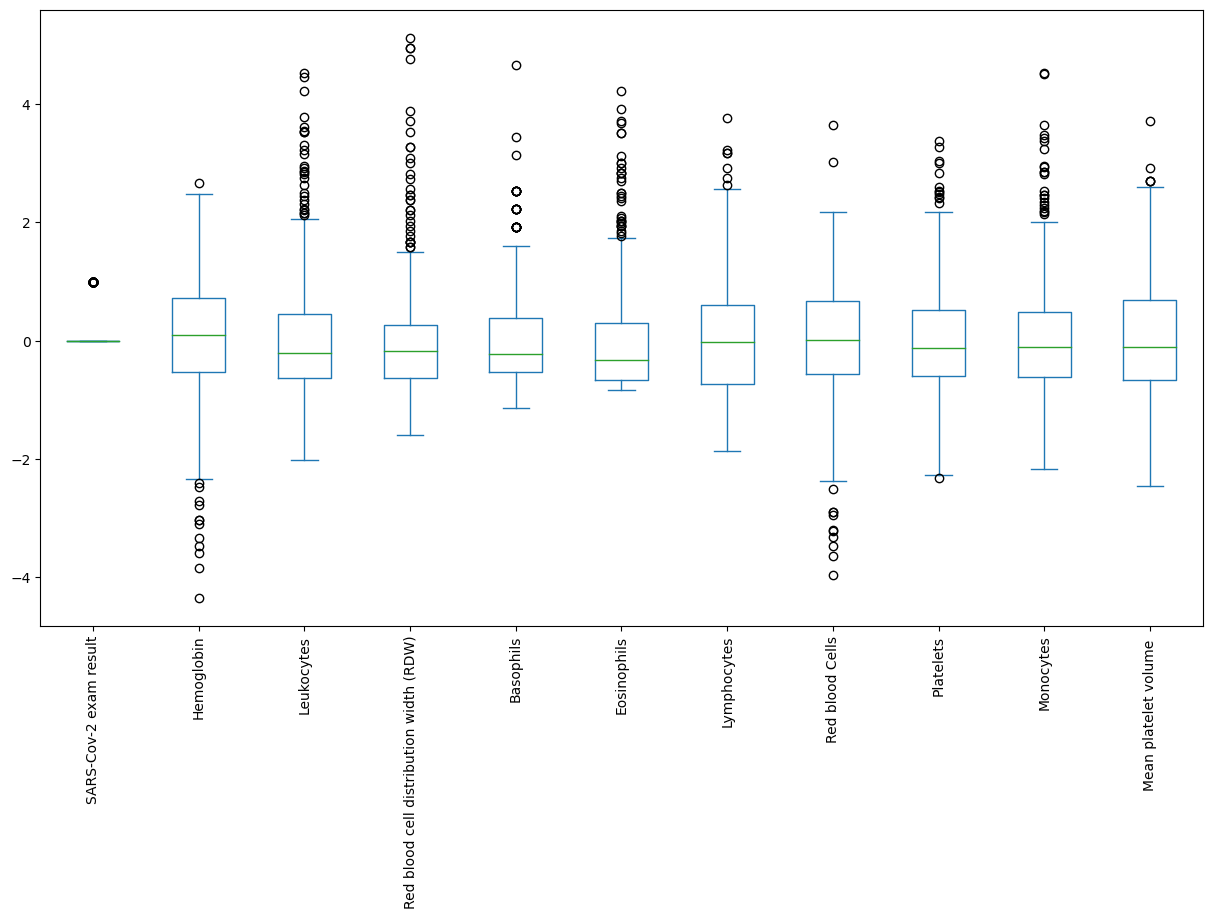

In [38]:
# boxplot para checagem da remoção dos outliers
ax = df_hg_03.plot.box(figsize=(15,8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

<Axes: >

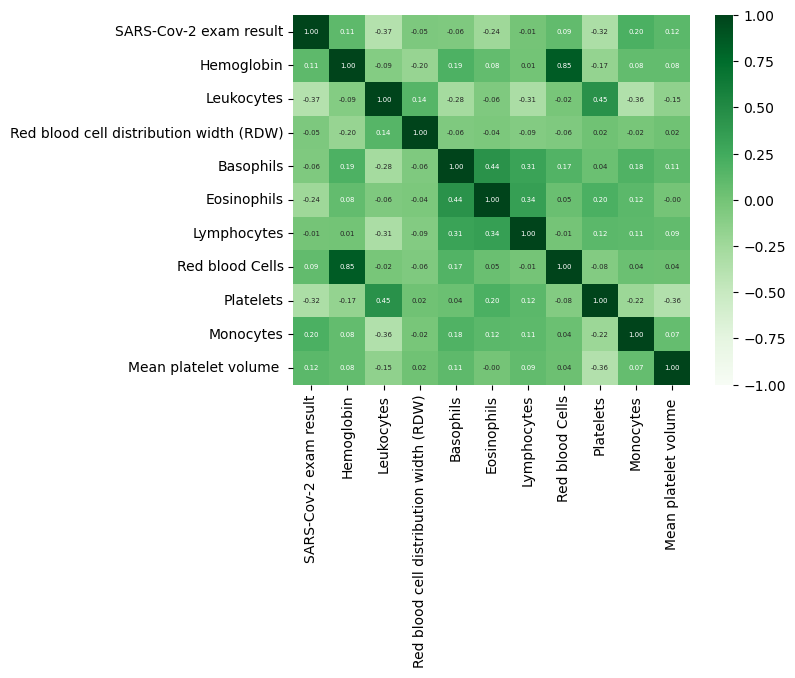

In [39]:
# matriz de correlação com outliers dropados
coef_matrix_spearman3 =df_hg_03.corr(method='spearman')
sns.heatmap(data=coef_matrix_spearman3, vmin=-1, vmax=1, cmap='Greens', annot=True, 
            fmt='.2f', annot_kws = {'size': 5})

**Decisão:** Pelo fato dos dados não terem a distribuição ou relações lineares determinadas com mais precisão, além da relativa baixa quantidade de variáveis, o modelo escolhido para realizar a predição foi o KNN (*K-Nearest Neighbors*). 

### Modelagem - KNN

**Dataset Hemograma total, sem outliers, K=3**

**Fluxo:** Criou-se a matriz com preditoras e o vetor com a target para usá-los na geração de um conjunto de treino e outro de teste, divisão estratificada pela *target*.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df_hg_03.head()

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1,0,-0.022340,-0.094610,-0.625073,-0.223767,1.482158,0.318366,0.102004,-0.517413,0.357547,0.010677
8,0,-0.774212,0.364550,-0.978899,-0.223767,1.018625,-0.005738,-0.850035,1.429667,0.068652,-1.672222
15,0,-0.586244,-0.884923,-1.067355,0.081693,-0.666950,-1.114514,-1.361315,-0.429480,1.276759,-0.213711
18,0,0.792188,-0.211488,0.171035,-0.834685,-0.709090,0.045436,0.542763,0.072992,-0.220244,-0.550290
22,0,-0.147652,-1.132592,0.613318,0.387152,-0.709090,0.002791,-0.127191,-0.668155,2.012129,1.020415


In [42]:
X=df_hg_03.drop('SARS-Cov-2 exam result', axis=1)
X.head()

,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume
1,-0.022340,-0.094610,-0.625073,-0.223767,1.482158,0.318366,0.102004,-0.517413,0.357547,0.010677
8,-0.774212,0.364550,-0.978899,-0.223767,1.018625,-0.005738,-0.850035,1.429667,0.068652,-1.672222
15,-0.586244,-0.884923,-1.067355,0.081693,-0.666950,-1.114514,-1.361315,-0.429480,1.276759,-0.213711
18,0.792188,-0.211488,0.171035,-0.834685,-0.709090,0.045436,0.542763,0.072992,-0.220244,-0.550290
22,-0.147652,-1.132592,0.613318,0.387152,-0.709090,0.002791,-0.127191,-0.668155,2.012129,1.020415


In [43]:
y=df_hg_03['SARS-Cov-2 exam result']
y

1       0
8       0
15      0
18      0
22      0
28      0
29      0
30      0
32      0
34      0
36      0
38      0
40      0
50      0
51      0
55      0
56      0
59      0
61      0
62      0
71      0
73      0
78      0
84      0
86      0
87      0
88      0
95      0
105     0
106     0
107     0
108     0
110     0
111     0
112     0
115     0
126     0
128     0
133     0
136     0
143     0
145     0
146     0
153     0
154     0
166     0
177     0
186     0
193     0
194     0
196     0
202     0
203     0
204     0
205     0
207     0
216     0
224     0
226     0
230     0
232     0
239     0
263     0
266     0
267     0
291     0
294     0
295     0
303     0
307     0
319     0
330     0
333     0
334     0
370     0
381     0
385     0
391     0
403     0
412     0
417     0
418     0
454     0
465     0
477     0
478     0
482     0
500     0
509     0
519     0
520     0
543     0
552     0
560     0
562     0
567     0
568     1
570     0
576     0
580     0


In [44]:
df_hg_03.shape

(593, 11)

In [45]:
# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [46]:
# tamanho dos sets de treino e teste
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, '\n y_train: ', y_train.shape, 'y_test:', y_test.shape)

X_train:  (444, 10) X_test:  (149, 10) 
 y_train:  (444,) y_test: (149,)


In [47]:
# proporção entre as classes da target no dataset
y.value_counts()/y.shape[0]*100

SARS-Cov-2 exam result
0    86.340641
1    13.659359
Name: count, dtype: float64

**Fluxo:** Como os dados já estavam escalonados, verificou-se visualmente se os dados de treino abrangem os dados de teste.

<Axes: >

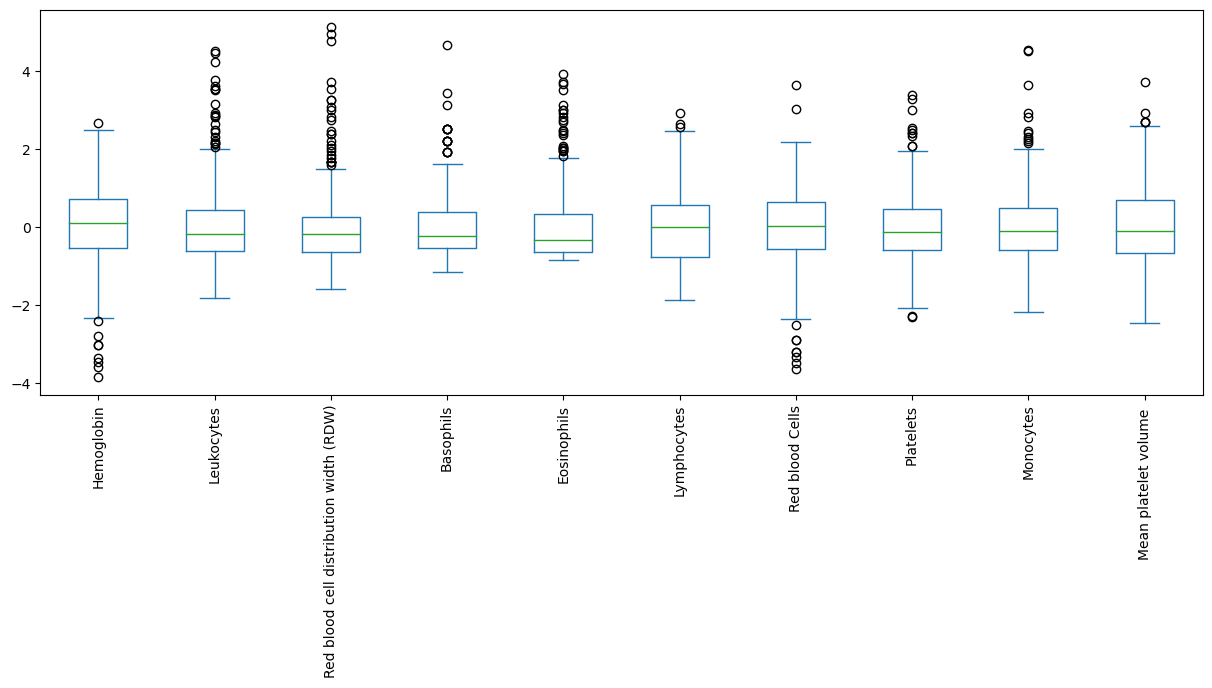

In [48]:
# boxplot do set de treino
X_train.plot.box(rot=90, grid=False, figsize=(15, 5))

<Axes: >

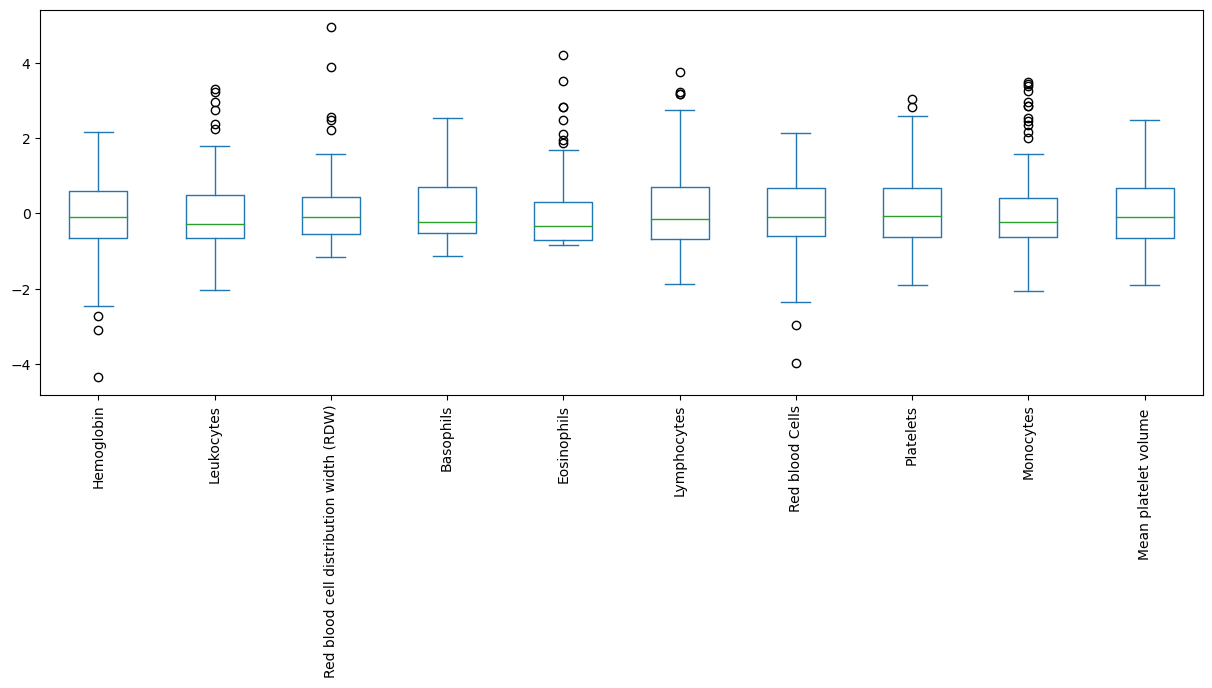

In [49]:
# boxplot do set de teste
X_test.plot.box(rot=90, grid=False, figsize=(15, 5))

**Análise:** Pontualmente, alguns valores outliers no conjunto de teste estão além do intervalo do conjunto de treino.

In [50]:
# criando o modelo
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [51]:
# aprendendo as distâncias
model.fit(X=X_train, y=y_train)

KNeighborsClassifier(metric='euclidean')

In [52]:
# calculando as predições das classes
y_pred = model.predict(X=X_test.values)
y_pred

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [53]:
# calculando as probabilidades das predições das classes
model.predict_proba(X=X_test.values)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. ,

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[122,   7],
       [ 15,   5]], dtype=int64)

In [56]:
confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])

array([[  5,  15],
       [  7, 122]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import recall_score

**TP / (TP + FP)**

*Precision* é a capacidade do modelo de não classificar como positivo um evento negativo.

A principal utilização desse indicador é para modelos onde seja necessário minimizar os Falsos Positivos. Quanto mais perto de 1, melhor.

In [58]:
precision_score(y_true=y_test, y_pred=y_pred)

0.4166666666666667

**TP / (TP + FN)**

*Recall* é a capacidade do modelo de não classificar como negativo um evento positivo, assim como informar o quanto se está identificando corretamente os eventos positivos.

A principal utilização desse indicador é para modelos onde seja necessário minimizar os Falsos Negativos, especialmente em casos onde o ônus de se classificar incorretamente um paciente doente como sadio para uma dada doença grave é muito maior do que classificar um paciente sadio como doente. Quanto mais próximo a 1, melhor.

In [59]:
recall_score(y_true=y_test, y_pred=y_pred)

0.25

In [60]:
from sklearn.metrics import f1_score

f1_score(y_true=y_test, y_pred=y_pred)

'''
F1 Score = 2 * ((Precision * Recall) / (Precision + Recall))
'''
2 * ((precision_score(y_true=y_test, y_pred=y_pred) * recall_score(y_true=y_test, y_pred=y_pred)) / (precision_score(y_true=y_test, y_pred=y_pred) + recall_score(y_true=y_test, y_pred=y_pred)))

0.3125

**Análise**: o modelo KNN (K=5) com o conjunto do Hemograma apresentou indicadores relativamente baixos de *Precision* (.42) e *Recall* (.25). Performando a mesma análise preditiva com K=3 os indicadores assumem valores bastante similares. 

**Decisão:** Optou-se por incluir a variável 'Proteína C reativa' ao modelo KNN. A Proteína C-Reativa (PCR) é uma proteína produzida pelo fígado em resposta a inflamação aguda ou infecção no corpo. Ela é um marcador de inflamação e é frequentemente medida em exames de sangue para auxiliar no diagnóstico e monitoramento de condições inflamatórias, como infecções, doenças autoimunes, lesões e doenças cardiovasculares.

**Dataset Hemograma + Proteína C reativa, sem outliers, K=5**

In [61]:
# criação de um DF-Hemograma com a coluna proteína reativa C, utilizando índice
pc_col = df_raw.loc[df_hg_03.index, 'Proteina C reativa mg/dL']
df_hg_pc = df_hg_03.copy()
df_hg_pc['PC reativa'] = pc_col
df_hg_pc.head()

,SARS-Cov-2 exam result,Hemoglobin,Leukocytes,Red blood cell distribution width (RDW),Basophils,Eosinophils,Lymphocytes,Red blood Cells,Platelets,Monocytes,Mean platelet volume,PC reativa
1,0,-0.022340,-0.094610,-0.625073,-0.223767,1.482158,0.318366,0.102004,-0.517413,0.357547,0.010677,-0.147895
8,0,-0.774212,0.364550,-0.978899,-0.223767,1.018625,-0.005738,-0.850035,1.429667,0.068652,-1.672222,-0.286986
15,0,-0.586244,-0.884923,-1.067355,0.081693,-0.666950,-1.114514,-1.361315,-0.429480,1.276759,-0.213711,NaN
18,0,0.792188,-0.211488,0.171035,-0.834685,-0.709090,0.045436,0.542763,0.072992,-0.220244,-0.550290,-0.487674
22,0,-0.147652,-1.132592,0.613318,0.387152,-0.709090,0.002791,-0.127191,-0.668155,2.012129,1.020415,NaN


In [62]:
# novos nulos
print('Nulos da variável Proteína C-reativa: ',df_hg_pc['PC reativa'].isnull().sum())

Nulos da variável Proteína C-reativa:  99


In [63]:
# dropando novos nulos
df_hg_pc.dropna(subset='PC reativa', how='any', inplace=True)

In [64]:
# nova estrutura do DF
df_hg_pc.shape

(494, 12)

In [65]:
# correlação da proteina C reativa
df_hg_pc.corr(method='spearman')['SARS-Cov-2 exam result']

SARS-Cov-2 exam result                     1.000000
Hemoglobin                                 0.118686
Leukocytes                                -0.374889
Red blood cell distribution width (RDW)   -0.065126
Basophils                                 -0.069384
Eosinophils                               -0.247648
Lymphocytes                                0.011152
Red blood Cells                            0.110719
Platelets                                 -0.346228
Monocytes                                  0.179915
Mean platelet volume                       0.120110
PC reativa                                 0.157953
Name: SARS-Cov-2 exam result, dtype: float64

**Análise:** A proteína C apresenta correlação de 0.16, o que não é muito significativo, mas maior que a maior parte das variáveis relacionadas às hemácias.

In [66]:
# criação da matriz de preditoras e do vetor da target para divisão do dataset em treino e teste
X=df_hg_pc.drop('SARS-Cov-2 exam result', axis=1)
y=df_hg_pc['SARS-Cov-2 exam result']

In [67]:
# tamanho dos sets de treino e teste
print('X_train: ', X_train.shape, 'X_test: ', X_test.shape, '\n y_train: ', y_train.shape, 'y_test:', y_test.shape)

X_train:  (444, 10) X_test:  (149, 10) 
 y_train:  (444,) y_test: (149,)


In [68]:
# dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [69]:
# criando o modelo

model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(X=X_train, y=y_train)

y_pred = model.predict(X=X_test.values)
y_pred_prob = model.predict_proba(X=X_test.values)

confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[1, 0])

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[ 9,  8],
       [ 8, 99]], dtype=int64)

In [70]:
# precisão
precision_score(y_true=y_test, y_pred=y_pred)

0.5294117647058824

In [71]:
# recall
recall_score(y_true=y_test, y_pred=y_pred)

0.5294117647058824

In [72]:
# f1 score
f1_score(y_true=y_test, y_pred=y_pred)

0.5294117647058824

**Análise:** Nota-se que a inclusão da proteína C no dataset aumentou o indicador *Precision* e*Recall* para 53%. É necessário ponderar que os dados **já estavam escalonados**, tornando os dados de teste "contaminados" com os parâmetros de escalonamento que foram realizados integralmente no dataset (*data leakage*). Esse processo tende a superestimar o poder de predição do modelo.

### Considerações | Recomendações 

- O dataset é bastante limitado pela falta de integridade dos dados obtidos de várias fontes. Apenas dois grupos identificáveis apresentam volumetria suficiente para uma análise preditiva. O hemograma se mostrou o melhor subset, com volumetria de dados válidos minimamente adequada, maior aplicabilidade e potencial de impacto para o negócio. Desse dataset, as maiores associações com a presença ou ausência de Covid foram os elementos figurados do sangue que atuam em uma resposta imunológica inespecífica (inata).

- A proteína C reativa aliada ao dataset do Hemograma provocou um aumento moderado na precisão e sensitividade do modelo (K=3), levando a um modelo inclusive mais equilibrado (53% para os dois indicadores) em relação tanto ao indicador-alvo (sensitividade) quanto à precisão. 

- Contudo, pela baixa volumetria dos dados utilizados e pelo *data leakage* provocado pelo escalonamento prévio, o modelo **não é recomendado**. Esforços como o aumento da amostragem dessa e das outras variáveis, além do fornecimento dos dados brutos, são relevantes para aprimorar o modelo e sua confiabilidade.

- Recomenda-se investir no processo de obtenção de dados mais consistentes e completos, principalmente relacionados aos glóbulos brancos, que indicam associações mais específicas e fortes com a Covid.